In [51]:
import pandas as pd
import json
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import numpy as np
%matplotlib inline

In [6]:
def read_csv(fname):
    f = lambda x : json.loads(x.replace("'","\""))
    df = pd.read_csv(fname, converters={'sensor_type': f}, index_col=0)
    return df

In [7]:
def save_graph(plot, fname='saved.png'):
    fig = plot.get_figure()
    fig.savefig(fname)

,n_train,auc
0,1,0.777778
24,5,0.783125
48,10,0.788264
72,20,0.823542


,n_train,auc
96,1,0.864491
120,5,0.849120
144,10,0.849676
168,20,0.856157


[ 0.86449074  0.84912037  0.84967593  0.85615741]


,n_train,k-means,kNN
0,1.0,0.777778,0.864491
1,5.0,0.783125,0.849120
2,10.0,0.788264,0.849676
3,20.0,0.823542,0.856157


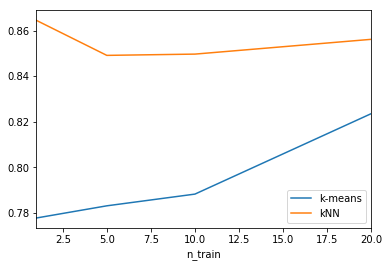

In [57]:
csv_file = 'test_record-20170425.csv'
df = read_csv(csv_file)
df.sort_values(by=['auc'], ascending=False).head()

df1 = df[
    (df['n_record'] == 1) & 
    (df['ms_interval'] == 20) &
    (df['sensor_type'].apply(lambda x: len(x) == 2)) &
    (df['type'] == 'k-means')
][['n_train', 'auc']]
display(df1)

df2 = df[
    (df['n_record'] == 1) & 
    (df['ms_interval'] == 20) &
    (df['sensor_type'].apply(lambda x: len(x) == 2)) &
    (df['type'] == 'kNN')
][['n_train', 'auc']]
display(df2)

x = df1['n_train'].values
y1 = df1['auc'].values
y2 = df2['auc'].values
print(y2)

df = pd.DataFrame(np.array([x, y1, y2]).T, columns=['n_train', 'k-means', 'kNN'])
display(df_)
df_.plot(x='n_train', y=['k-means', 'kNN'])